In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from prophet import Prophet

from  prophet.plot import add_changepoints_to_plot

In [4]:
data = pd.read_csv("/content/drive/MyDrive/The Eggcellent Predictor /Data/eggprice2.csv")

In [5]:
data.head()

,Program,Year,Month,day,Week Ending,Geo Level,State,watershed_code,Commodity,Data Item,Domain,Domain Category,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay
0,SURVEY,2023,2,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.61,"50,031,000","181,566,000","8,225,300,000",NaN,NaN,"52,048,000","2,171"
1,SURVEY,2023,1,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,3.00,"47,370,000","188,508,000","8,225,300,000",NaN,NaN,"50,748,000","2,413"
2,SURVEY,2022,4,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,2.30,"53,971,000","190,571,000","8,225,300,000",NaN,NaN,"50,636,000","2,390"
3,SURVEY,2022,8,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,1.94,"57,156,000","209,396,000","8,225,300,000",NaN,NaN,"55,991,000","2,449"
4,SURVEY,2022,12,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",TOTAL,NOT SPECIFIED,4.49,"49,852,000","181,674,000","8,225,300,000",NaN,NaN,"48,438,000","2,434"


In [6]:
data.dtypes

Program                object
Year                    int64
Month                   int64
day                     int64
Week Ending           float64
Geo Level              object
State                  object
watershed_code          int64
Commodity              object
Data Item              object
Domain                 object
Domain Category        object
price                 float64
chicken                object
broken eggs            object
production eggs        object
chicken production     object
chicken died           object
Hatch chicken          object
chicken lay            object
dtype: object

In [7]:
data['Year'] = data['Year'].astype('str')
data['Month'] = data['Month'].astype('str')
data['day'] = data['day'].astype('str')

In [8]:
data['date'] = data['Year']+ ' - '+ data['Month']+ ' - '+ data['day']

In [9]:
data['date']

0       2023 - 2 - 1
1       2023 - 1 - 1
2       2022 - 4 - 1
3       2022 - 8 - 1
4      2022 - 12 - 1
           ...      
286     1999 - 5 - 1
287    1999 - 11 - 1
288    1999 - 10 - 1
289     1999 - 9 - 1
290    1998 - 12 - 1
Name: date, Length: 291, dtype: object

In [10]:
data["date"] = pd.to_datetime(data["date"])


In [11]:
data.dtypes

Program                       object
Year                          object
Month                         object
day                           object
Week Ending                  float64
Geo Level                     object
State                         object
watershed_code                 int64
Commodity                     object
Data Item                     object
Domain                        object
Domain Category               object
price                        float64
chicken                       object
broken eggs                   object
production eggs               object
chicken production            object
chicken died                  object
Hatch chicken                 object
chicken lay                   object
date                  datetime64[ns]
dtype: object

In [12]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['date'])
df['y'] = data['price']
df.head()

,ds,y
0,2023-02-01,2.61
1,2023-01-01,3.00
2,2022-04-01,2.30
3,2022-08-01,1.94
4,2022-12-01,4.49


#Initializing a Prophet Model

By using the Prophet() command we can initialize an instance of the fbprophet model for the training on our dataset and then help us to perform time series forecasting.

In [24]:

m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9scgum8/069h35g9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9scgum8/0th6w0nr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35319', 'data', 'file=/tmp/tmph9scgum8/069h35g9.json', 'init=/tmp/tmph9scgum8/0th6w0nr.json', 'output', 'file=/tmp/tmph9scgum8/prophet_modelm8gkkc3d/prophet_model-20230420033711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:37:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:37:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


We want our model to predict the next 5 years.The frequency of our data is 1 month and thus for 5 years, it is 12 * 5 = 60 months. So we need to add 60 to more rows of monthly data to a dataframe.

In [14]:
future = m.make_future_dataframe(periods=12 * 5,
                                 freq='M')

In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
		'yhat_upper', 'trend',
		'trend_lower', 'trend_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
346,2027-09-30,1.809407,1.295225,2.301438,1.994529,1.973662,2.015847
347,2027-10-31,2.255609,1.769148,2.763173,2.001883,1.980359,2.024084
348,2027-11-30,2.222300,1.769883,2.720777,2.009000,1.986778,2.031681
349,2027-12-31,2.062576,1.541188,2.570986,2.016354,1.993519,2.039650
350,2028-01-31,2.133484,1.661426,2.606097,2.023709,2.000212,2.047886


#Plotting the Forecast Data

Table ds, as we know, is the time series data. yhat is the prediction, yhat_lower, and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels). Next up we have a trend that shows the long-term growth, shrink, or stagnancy of the data, trend_lower, and trend_upper is the uncertainty levels.

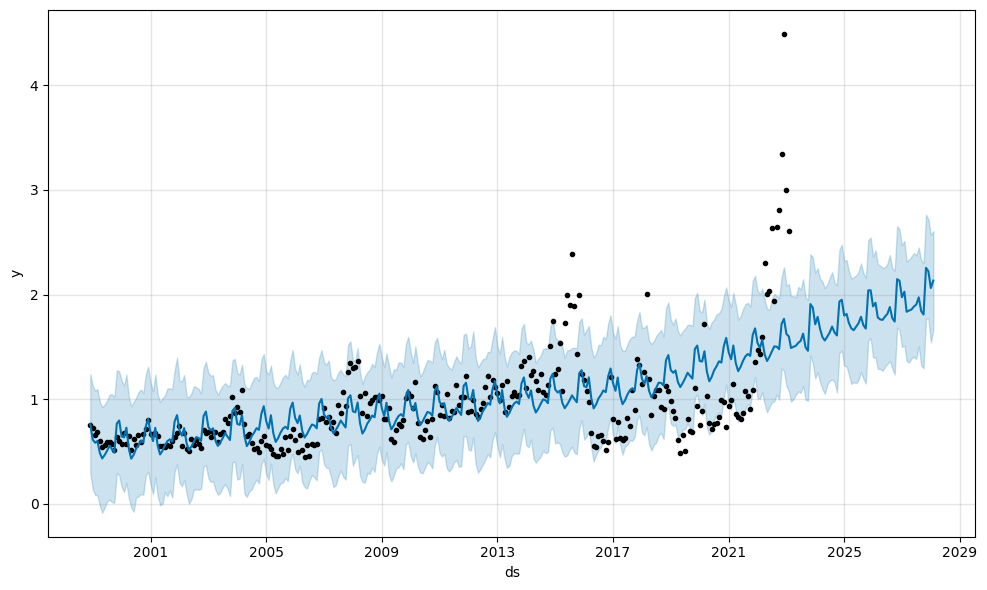

In [16]:
fig1 = m.plot(forecast)


The Above image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data. We can see that the predicted data is very close to the actual data. In the last five years, there is no “actual” data, but looking at the performance of our model in years where data is available it is safe to say that the predictions are close to accurate.

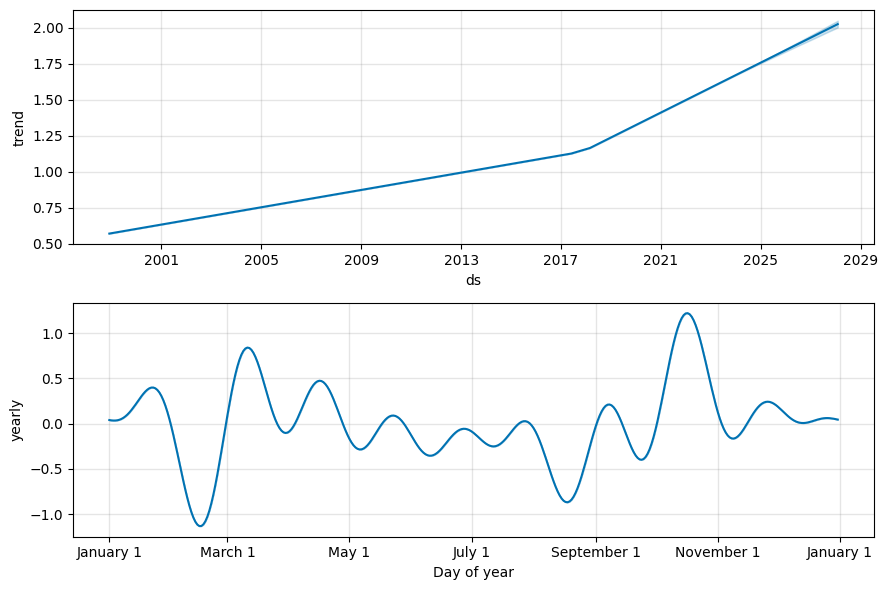

In [17]:
fig2 = m.plot_components(forecast)


The Above images show the trends and seasonality(in a year) of the time series data. 
We can see there is an increasing trend, meaning the price of eggs has increased over time.
 If we look at the seasonality graph, we can see that March and September/November is the time with the highest egg prices

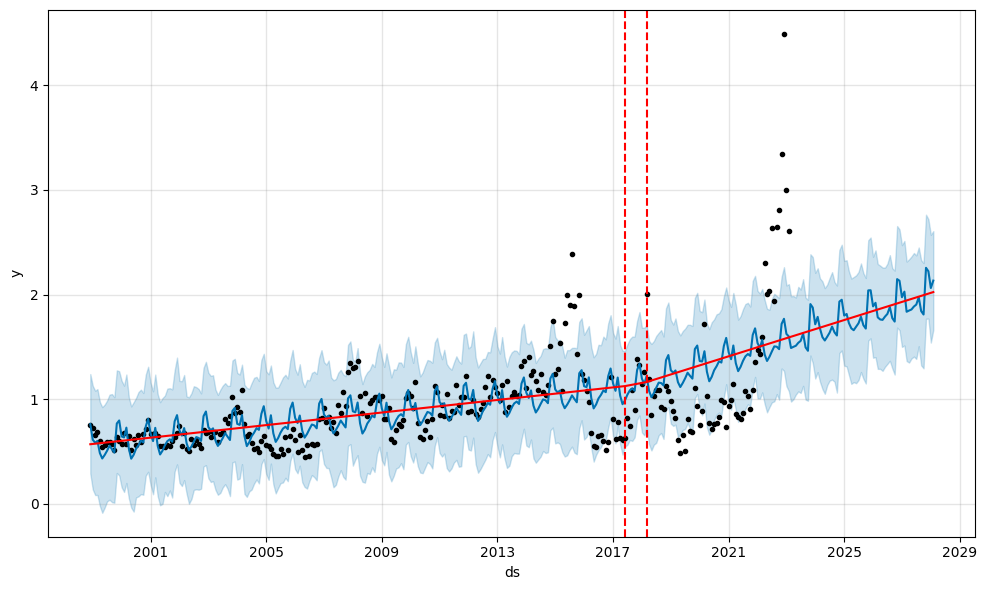

In [18]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
                             m, forecast)

Add changepoints to indicate the time in rapid trend growths. The dotted red lines show the time when there was a rapid change in the trend of Egg prices. 

Things to consider- We can change the changepoints so that certain values have more or less influence on results


# Running Model again with different hyperparameters

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9scgum8/lqbl4v31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9scgum8/src1k6ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7218', 'data', 'file=/tmp/tmph9scgum8/lqbl4v31.json', 'init=/tmp/tmph9scgum8/src1k6ii.json', 'output', 'file=/tmp/tmph9scgum8/prophet_model1uk92twg/prophet_model-20230420033653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:36:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:36:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


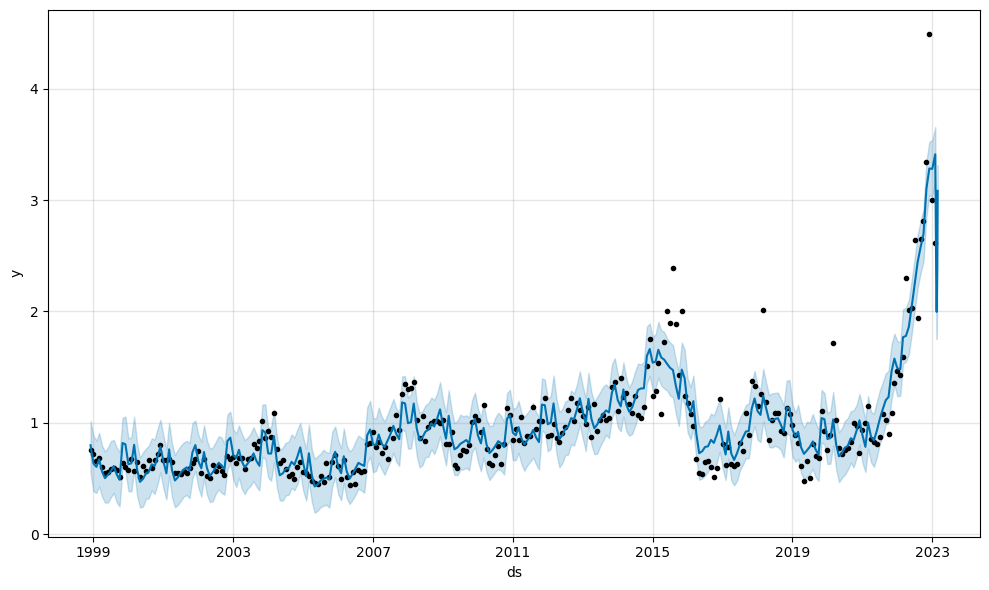

In [19]:
# instantiate the model and fit the timeseries
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)
prophet.fit(df)

# create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)

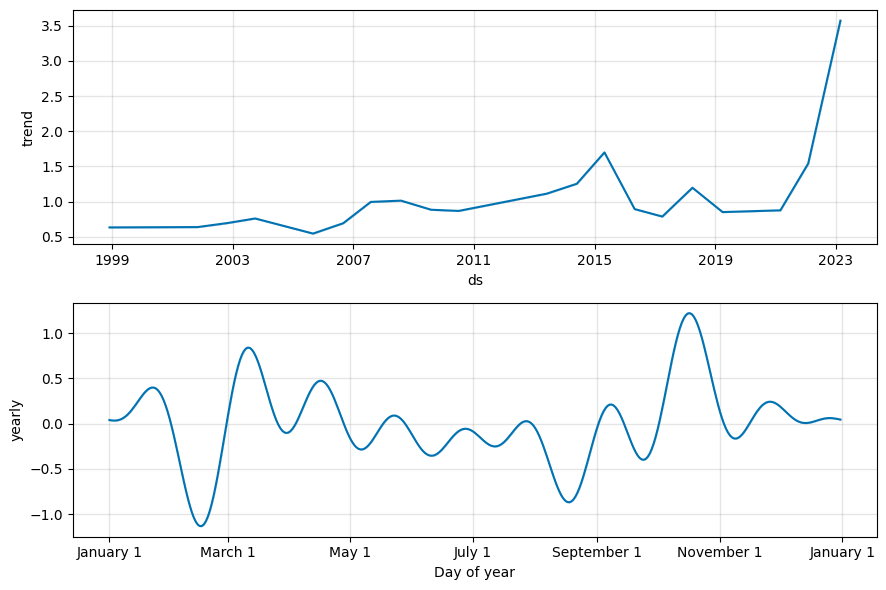

In [20]:

# Python
fig2 = m.plot_components(forecast)


Let's try a correlation matrix

In [21]:
import seaborn as sns

In [22]:
data.head()


,Program,Year,Month,day,Week Ending,Geo Level,State,watershed_code,Commodity,Data Item,...,Domain Category,price,chicken,broken eggs,production eggs,chicken production,chicken died,Hatch chicken,chicken lay,date
0,SURVEY,2023,2,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,2.61,"50,031,000","181,566,000","8,225,300,000",NaN,NaN,"52,048,000","2,171",2023-02-01
1,SURVEY,2023,1,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,3.00,"47,370,000","188,508,000","8,225,300,000",NaN,NaN,"50,748,000","2,413",2023-01-01
2,SURVEY,2022,4,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,2.30,"53,971,000","190,571,000","8,225,300,000",NaN,NaN,"50,636,000","2,390",2022-04-01
3,SURVEY,2022,8,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,1.94,"57,156,000","209,396,000","8,225,300,000",NaN,NaN,"55,991,000","2,449",2022-08-01
4,SURVEY,2022,12,1,NaN,NATIONAL,US TOTAL,0,EGGS,"EGGS - PRICE RECEIVED, MEASURED IN $ / DOZEN",...,NOT SPECIFIED,4.49,"49,852,000","181,674,000","8,225,300,000",NaN,NaN,"48,438,000","2,434",2022-12-01


In [23]:
matrix = data.corr()

print(matrix)

                Week Ending  watershed_code  price
Week Ending             NaN             NaN    NaN
watershed_code          NaN             NaN    NaN
price                   NaN             NaN    1.0


<ipython-input-23-c33813c136cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()
